In [17]:
%matplotlib inline
import pandas as pd
import warnings; warnings.simplefilter('ignore')
from nlpia.data.loaders import get_data
pd.options.display.width = 120  # <1>

sms = get_data('sms-spam')
index = ['sms{}{}'.format(i, '!'*j) for (i,j) in zip(range(len(sms)), sms.spam)]  # <2>
sms = pd.DataFrame(sms.values, columns=sms.columns, index=index)
mask = sms.spam.astype(bool)
sms['spam'] = sms.spam.astype(int)
sms.head(6)

,spam,text
sms0,0,"Go until jurong point, crazy.. Available only ..."
sms1,0,Ok lar... Joking wif u oni...
sms2!,1,Free entry in 2 a wkly comp to win FA Cup fina...
sms3,0,U dun say so early hor... U c already then say...
sms4,0,"Nah I don't think he goes to usf, he lives aro..."
sms5!,1,FreeMsg Hey there darling it's been 3 week's n...


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize.casual import casual_tokenize

tfidf_model = TfidfVectorizer(tokenizer=casual_tokenize)
tfidf_docs = tfidf_model.fit_transform(raw_documents=sms.text).toarray()
tfidf_docs.shape

(4837, 9232)

In [25]:
spam_centroid = tfidf_docs[sms.spam.astype(bool)].mean(axis=0)
ham_centroid = tfidf_docs[~sms.spam.astype(bool)].mean(axis=0)
print(spam_centroid.round(2))
print(ham_centroid.round(2))
spamminess_score = tfidf_docs.dot(spam_centroid - ham_centroid)
print(spamminess_score)

[0.06 0.   0.   ... 0.   0.   0.  ]
[0.02 0.01 0.   ... 0.   0.   0.  ]
[-0.01469806 -0.02007376  0.03856095 ... -0.01014774 -0.00344281
  0.00395752]


In [27]:
from sklearn.preprocessing import MinMaxScaler
sms['lda_score'] = MinMaxScaler().fit_transform(spamminess_score.reshape(-1,1))
sms['lda_predict'] = (sms.lda_score > .5).astype(int)
sms['spam lda_predict lda_score'.split()].round(2).head(6)

,spam,lda_predict,lda_score
sms0,0,0,0.23
sms1,0,0,0.18
sms2!,1,1,0.72
sms3,0,0,0.18
sms4,0,0,0.29
sms5!,1,1,0.55


In [28]:
print((1. - (sms.spam - sms.lda_predict).abs().sum() / len(sms)).round(3))

0.977


In [35]:
!conda list -n nlpia | grep nlup

nlup                      0.7.post1                 <pip>


In [7]:
from sklearn.decomposition import PCA
import matplotlib
matplotlib.use('TkAgg')
import matplotlib
matplotlib.use('TkAgg')
import seaborn

from matplotlib import pyplot as plt
from nlpia.data.loaders import get_data

In [1]:
topic = {}
tfidf = dict(list(zip('cat dog apple lion NYC love'.split(), [1, 1, 1, 1, 1, 1])))
topic['pet'] = (.3 * tfidf['cat'] + .3 * tfidf['dog'] + 0 * tfidf['apple']
                + 0 * tfidf['lion'] - .2 * tfidf['NYC'] + .2 * tfidf['love'])
topic['animal'] = (.1 * tfidf['cat'] + .1 * tfidf['dog'] - .1 * tfidf['apple']
                   + .5 * tfidf['lion'] + .1 * tfidf['NYC'] - .1 * tfidf['love'])
topic['city'] = (0 * tfidf['cat'] - .1 * tfidf['dog'] + .2 * tfidf['apple']
                 - .1 * tfidf['lion'] + .5 * tfidf['NYC'] + .1 * tfidf['love'])


word_vector = {}
word_vector['cat'] = .3 * topic['pet'] + .1 * topic['animal'] + 0 * topic['city']
word_vector['dog'] = .3 * topic['pet'] + .1 * topic['animal'] - .1 * topic['city']
word_vector['apple'] = 0 * topic['pet'] - .1 * topic['animal'] + .2 * topic['city']
word_vector['lion'] = 0 * topic['pet'] + .5 * topic['animal'] - .1 * topic['city']
word_vector['NYC'] = -.2 * topic['pet'] + .1 * topic['animal'] + .5 * topic['city']
word_vector['love'] = .2 * topic['pet'] - .1 * topic['animal'] + .1 * topic['city']

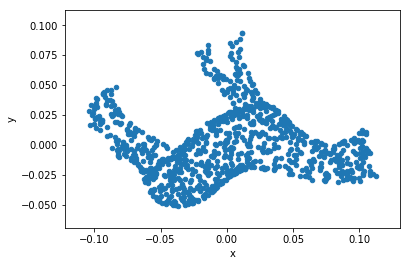

In [9]:
df = get_data('pointcloud').sample(1000)
pca = PCA(n_components=2)
df2d = pd.DataFrame(pca.fit_transform(df), columns=list('xy'))
df2d.plot(kind='scatter', x='x', y='y')
plt.show()

In [38]:
from nlpia.book.examples.ch04_catdog_lsa_3x6x16 import word_topic_vectors
word_topic_vectors.T.round(1)

,cat,dog,apple,lion,nyc,love
top0,-0.6,-0.4,0.5,-0.3,0.4,-0.1
top1,-0.1,-0.3,-0.4,-0.1,0.1,0.8
top2,-0.3,0.8,-0.1,-0.5,0.0,0.1


In [12]:
from nlpia.book.examples.ch04_catdog_lsa_sorted import lsa_models, prettify_tdm

100%|██████████| 263/263 [00:00<00:00, 349636.12it/s]


In [13]:
bow_svd, tfidf_svd = lsa_models()

100%|██████████| 263/263 [00:00<00:00, 410380.19it/s]


In [14]:
prettify_tdm(**bow_svd)

,cat,dog,apple,lion,nyc,love,text
0,,,1,,1,,NYC is the Big Apple.
1,,,1,,1,,NYC is known as the Big Apple.
2,,,,,1,1,I love NYC!
3,,,1,,1,,I wore a hat to the Big Apple party in NYC.
4,,,1,,1,,Come to NYC. See the Big Apple!
5,,,1,,,,Manhattan is called the Big Apple.
6,1,,,,,,New York is a big city for a small cat.
7,1,,,1,,,"The lion, a big cat, is the king of the jungle."
8,1,,,,,1,I love my pet cat.
9,,,,,1,1,I love New York City (NYC).


In [15]:
tdm = bow_svd['tdm']
tdm

,0,1,2,3,4,5,6,7,8,9,10
cat,0,0,0,0,0,0,1,1,1,0,1
dog,0,0,0,0,0,0,0,0,0,0,1
apple,1,1,0,1,1,1,0,0,0,0,0
lion,0,0,0,0,0,0,0,1,0,0,0
nyc,1,1,1,1,1,0,0,0,0,1,0
love,0,0,1,0,0,0,0,0,1,1,0


#### The U matrix contains the term-topic matrix that tells you about "the company a word keeps"

In [40]:
import numpy as np
U, s, Vt = np.linalg.svd(tdm)  # <1>
pd.DataFrame(U, index=tdm.index).round(2)

,0,1,2,3,4,5
cat,-0.04,0.83,-0.38,-0.00,0.11,-0.38
dog,-0.00,0.21,-0.18,-0.71,-0.39,0.52
apple,-0.62,-0.21,-0.51,0.00,0.49,0.27
lion,-0.00,0.21,-0.18,0.71,-0.39,0.52
nyc,-0.75,0.00,0.24,-0.00,-0.52,-0.32
love,-0.22,0.42,0.69,0.00,0.41,0.37


#### The Sigma or S matrix contains the topic "singular values" in a square diagonal matrix

In [41]:
print(s.round(1))
S = np.zeros((len(U), len(Vt)))
pd.np.fill_diagonal(S, s)
pd.DataFrame(S).round(1)

[3.1 2.2 1.8 1.  0.8 0.5]


,0,1,2,3,4,5,6,7,8,9,10
0,3.1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,2.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.8,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.5,0.0,0.0,0.0,0.0,0.0


#### The V T matrix contains the "right singular vectors" as the columns of the document-document matrix.

In [42]:
pd.DataFrame(Vt).round(2)

,0,1,2,3,4,5,6,7,8,9,10
0,-0.44,-0.44,-0.31,-0.44,-0.44,-0.20,-0.01,-0.01,-0.08,-0.31,-0.01
1,-0.09,-0.09,0.19,-0.09,-0.09,-0.09,0.37,0.47,0.56,0.19,0.47
2,-0.16,-0.16,0.52,-0.16,-0.16,-0.29,-0.22,-0.32,0.17,0.52,-0.32
3,0.00,-0.00,-0.00,0.00,0.00,0.00,-0.00,0.71,-0.00,-0.00,-0.71
4,-0.04,-0.04,-0.14,-0.04,-0.04,0.58,0.13,-0.33,0.62,-0.14,-0.33
5,-0.09,-0.09,0.10,-0.09,-0.09,0.51,-0.73,0.27,-0.01,0.10,0.27
6,-0.57,0.21,0.11,0.33,-0.31,0.34,0.34,0.00,-0.34,0.23,0.00
7,-0.32,0.47,0.25,-0.63,0.41,0.07,0.07,0.00,-0.07,-0.18,0.00
8,-0.50,0.29,-0.20,0.41,0.16,-0.37,-0.37,-0.00,0.37,-0.17,0.00
9,-0.15,-0.15,-0.59,-0.15,0.42,0.04,0.04,-0.00,-0.04,0.63,-0.00


In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize.casual import casual_tokenize

sms = get_data('sms-spam')
sms.head(6)

,spam,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
5,1,FreeMsg Hey there darling it's been 3 week's n...


In [9]:
tfidf = TfidfVectorizer(tokenizer=casual_tokenize)
tfidf_docs = tfidf.fit_transform(raw_documents=sms.text).toarray()
print(tfidf_docs.shape)
# (4837, 9232)
sms.spam.sum()

(4837, 9232)


638

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=16)
pca = pca.fit(tfidf_docs)
pca_topic_vectors = pca.transform(tfidf_docs)
pca_topic_vectors = pd.DataFrame(pca_topic_vectors, columns=['topic{}'.format(i) for i in range(16)])
pca_topic_vectors.head()

,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,topic10,topic11,topic12,topic13,topic14,topic15
0,0.201168,0.002785,0.037258,0.010950,-0.019033,-0.053035,0.038983,-0.065381,0.012768,-0.082986,0.006900,-0.013635,0.003732,-0.030507,-0.016874,0.036831
1,0.404378,-0.093876,-0.077519,0.050887,0.100089,0.047164,0.022846,0.064884,0.023270,-0.023916,-0.004308,0.033972,0.045046,-0.021160,0.050910,-0.029717
2,-0.030457,-0.048114,0.090202,-0.067134,0.090786,-0.043104,-0.000196,-0.000611,-0.056814,0.050853,0.123011,0.016903,0.027254,-0.010754,-0.038156,0.062158
3,0.329046,-0.032782,-0.034587,-0.015814,0.052206,0.055785,-0.165545,-0.073989,0.062906,-0.107677,0.022152,0.022478,0.073130,-0.047667,0.019244,-0.074075
4,0.002161,0.030870,0.038326,0.033849,-0.074626,-0.092571,-0.043767,0.061057,-0.045100,0.027438,0.029204,-0.005983,0.025601,0.034022,-0.077370,-0.012928


In [11]:
tfidf_docs_df = pd.DataFrame(tfidf_docs)
columns = ['topic{}'.format(i) for i in range(pca.n_components)]

In [14]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=16, n_iter=100)
svd_topic_vectors = svd.fit_transform(tfidf_docs_df.values)
svd_topic_vectors = pd.DataFrame(svd_topic_vectors, columns=columns,index=index)
svd_topic_vectors.round(3).head(6)

,topic0,topic1,topic2,topic3,topic4,topic5,topic6,topic7,topic8,topic9,topic10,topic11,topic12,topic13,topic14,topic15
sms0,0.117,0.197,0.001,0.047,0.030,0.023,-0.056,0.067,-0.079,-0.070,-0.018,-0.003,0.008,0.005,-0.036,-0.045
sms1,0.111,0.421,-0.089,0.001,0.005,-0.096,0.052,0.034,0.046,0.016,-0.032,-0.017,-0.035,0.043,-0.023,0.071
sms2!,0.116,-0.047,-0.053,0.019,0.102,-0.074,-0.045,0.010,0.021,-0.027,0.141,-0.042,-0.024,0.029,-0.013,-0.068
sms3,0.136,0.343,-0.030,-0.003,0.120,-0.011,0.034,-0.119,-0.100,-0.033,-0.069,-0.081,-0.029,0.078,-0.037,0.073
sms4,0.118,-0.002,0.029,0.049,-0.027,0.068,-0.097,-0.043,0.080,0.006,0.020,-0.044,0.001,0.031,0.054,-0.029
sms5!,0.228,0.003,0.058,0.022,0.080,-0.106,-0.042,0.046,0.160,0.047,0.066,0.015,-0.049,-0.044,0.068,-0.021


In [15]:
import numpy as np
svd_topic_vectors = (svd_topic_vectors.T / np.linalg.norm(svd_topic_vectors, axis=1)).T
svd_topic_vectors.iloc[:10].dot(svd_topic_vectors.iloc[:10].T).round(1)

,sms0,sms1,sms2!,sms3,sms4,sms5!,sms6,sms7,sms8!,sms9!
sms0,1.0,0.7,0.2,0.7,0.2,0.1,0.1,0.0,0.1,0.0
sms1,0.7,1.0,-0.0,0.8,-0.0,0.2,0.1,-0.0,0.0,0.1
sms2!,0.2,-0.0,1.0,0.0,0.3,0.6,0.3,0.4,0.6,0.5
sms3,0.7,0.8,0.0,1.0,0.0,0.0,0.2,-0.1,0.0,0.1
sms4,0.2,-0.0,0.3,0.0,1.0,0.5,0.3,0.2,0.0,0.1
sms5!,0.1,0.2,0.6,0.0,0.5,1.0,0.4,0.4,0.5,0.6
sms6,0.1,0.1,0.3,0.2,0.3,0.4,1.0,0.4,0.2,0.2
sms7,0.0,-0.0,0.4,-0.1,0.2,0.4,0.4,1.0,0.4,0.7
sms8!,0.1,0.0,0.6,0.0,0.0,0.5,0.2,0.4,1.0,0.5
sms9!,0.0,0.1,0.5,0.1,0.1,0.6,0.2,0.7,0.5,1.0


In [16]:
sum([len(casual_tokenize(t)) for t in sms.text]) * 1. / len(sms.text)

21.34794293983874